<a href="https://colab.research.google.com/github/RayyanNasution/Assignment/blob/main/PYTN_Assgn_2_batch_3_Muhammat_Rayyan_Nasution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT 2 [INFERENTIAL STATISTICS]

Muhammat Rayyan Nasution_PYTN-KS08-015

Dataset ini berisi catatan dari setiap bangunan atau unit bangunan (apartemen, dll) yang dijual di pasar properti Kota New York selama periode 12 bulan.

##IMPORT PUSTAKA

In [1]:
import pandas as pd
import numpy as np

##LOAD DATASET

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv('drive/MyDrive/H8/nyc-rolling-sales.csv')

Mounted at /content/drive/


In [3]:
# information of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [4]:
# see all features in DataFrame
pd.set_option('display.max.columns',None)
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
df['BUILDING CLASS CATEGORY'].value_counts()

01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - ELEVATOR APARTMENTS                  12902
03 THREE FAMILY DWELLINGS                        4384
07 RENTALS - WALKUP APARTMENTS                   3466
09 COOPS - WALKUP APARTMENTS                     2767
04 TAX CLASS 1 CONDOS                            1656
44 CONDO PARKING                                 1441
15 CONDOS - 2-10 UNIT RESIDENTIAL                1281
05 TAX CLASS 1 VACANT LAND                       1248
17 CONDO COOPS                                   1201
22 STORE BUILDINGS                                935
12 CONDOS - WALKUP APARTMENTS                     926
14 RENTALS - 4-10 UNIT                            671
29 COMMERCIAL GARAGES                             587
43 CONDO OFFICE BUILDINGS                         475
31 COMMERCIAL VACANT LAND                         463
08 RENTALS - ELEVATOR APARTM

In [6]:
df['BOROUGH'].value_counts()

4    26736
3    24047
1    18306
5     8410
2     7049
Name: BOROUGH, dtype: int64

In [7]:
# take only data in Queens' neighbourhood
kondisi = df['BOROUGH'] == 4
col = ['BUILDING CLASS CATEGORY','SALE PRICE']
df_queens = df.loc[kondisi,col]

In [8]:
# take only ONE FAMILY DWELLINGS
df_queens_singleFamily = df_queens[df_queens['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS                    ']
df_queens_singleFamily.head()

,BUILDING CLASS CATEGORY,SALE PRICE
49402,01 ONE FAMILY DWELLINGS,792000
49403,01 ONE FAMILY DWELLINGS,10
49404,01 ONE FAMILY DWELLINGS,275500
49410,01 ONE FAMILY DWELLINGS,369046
49411,01 ONE FAMILY DWELLINGS,250000


In [9]:
# loop items in SALE PRICE column
# change non numerical data into null value
for idx, row in df_queens_singleFamily['SALE PRICE'].iteritems():
    if type(row) == str:
        if row.isnumeric():
            pass
        else:
            df_queens_singleFamily.loc[idx,'SALE PRICE'] = np.nan

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [10]:
# convert values in SALE PRICE from str to numeric
df_queens_singleFamily['SALE PRICE'] = pd.to_numeric(df_queens_singleFamily['SALE PRICE'])

<ipython-input-10-807f60939a8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_queens_singleFamily['SALE PRICE'] = pd.to_numeric(df_queens_singleFamily['SALE PRICE'])


In [11]:
# from information below, a lot null values have been discovered
df_queens_singleFamily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8563 entries, 49402 to 75718
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BUILDING CLASS CATEGORY  8563 non-null   object 
 1   SALE PRICE               5930 non-null   float64
dtypes: float64(1), object(1)
memory usage: 458.7+ KB


In [12]:
# drop null values to get better calculation
df_queens_singleFamily.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [13]:
# take property data with >= 1000 sale price
kondisi = df_queens_singleFamily['SALE PRICE'] >= 1000
df_queens_singleFamily = df_queens_singleFamily.loc[kondisi,:]
df_queens_singleFamily

,BUILDING CLASS CATEGORY,SALE PRICE
49402,01 ONE FAMILY DWELLINGS,792000.0
49404,01 ONE FAMILY DWELLINGS,275500.0
49410,01 ONE FAMILY DWELLINGS,369046.0
49411,01 ONE FAMILY DWELLINGS,250000.0
49412,01 ONE FAMILY DWELLINGS,370000.0
...,...,...
75712,01 ONE FAMILY DWELLINGS,650000.0
75713,01 ONE FAMILY DWELLINGS,612000.0
75714,01 ONE FAMILY DWELLINGS,750000.0
75716,01 ONE FAMILY DWELLINGS,856500.0


In [14]:
# convert SALE PRICE column into array
np_arrayA = np.array(df_queens_singleFamily['SALE PRICE'])

In [15]:
# Mean
mean = np_arrayA.mean()
mean

613090.8223218906

In [16]:
# Median
np.median(np_arrayA)

550000.0

In [17]:
# Mode
from scipy import stats as st

st.mode(np_arrayA)

ModeResult(mode=array([450000.]), count=array([75]))

In [18]:
# Range
mx = np.max(np_arrayA)
mn = np.min(np_arrayA)
result = mx - mn
result

3999000.0

In [19]:
# Standard Deviation
sd = np.std(np_arrayA)
sd

322654.0930003001

In [20]:
# Variance
sd**2

104105663729.84631

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Probability Density')

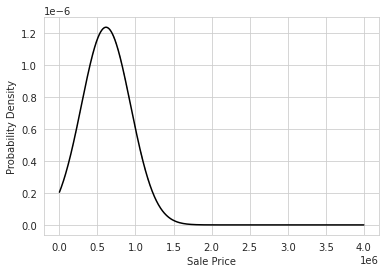

In [21]:
# import required libraries
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

# creating the  distribution
pdf = norm.pdf(np_arrayA,
               loc=mean,
               scale=sd)

# visualizing the distribution
sns.set_style('whitegrid')
sns.lineplot(np_arrayA, pdf, color='black')
plt.xlabel('Sale Price')
plt.ylabel('Probability Density')

In [22]:
# calculate mean, standard deviation and number of observation
df_queens_singleFamily.groupby('BUILDING CLASS CATEGORY').agg({'SALE PRICE':[np.mean, np.std, np.size]})

SALE PRICE                 \
                                                      mean            std   
BUILDING CLASS CATEGORY                                                     
01 ONE FAMILY DWELLINGS                      613090.822322  322681.926004   

                                                   
                                             size  
BUILDING CLASS CATEGORY                            
01 ONE FAMILY DWELLINGS                      5797

In [23]:
# manually write the result
mean = 613090.822322
sd = 322681.926004
n = 5797
z = 1.96

In [24]:
# count standard error
se = sd / np.sqrt(n)
se

4238.117471821613

In [25]:
# CI with mean
lb = mean - z * se
ub = mean + z * se
print(lb, ub)

604784.1120772297 621397.5325667704


In [26]:
# see data frame
df_queens.head()

,BUILDING CLASS CATEGORY,SALE PRICE
49402,01 ONE FAMILY DWELLINGS,792000
49403,01 ONE FAMILY DWELLINGS,10
49404,01 ONE FAMILY DWELLINGS,275500
49405,03 THREE FAMILY DWELLINGS,970000
49406,07 RENTALS - WALKUP APARTMENTS,1400000


In [27]:
# check population's proportion
p_queens = len(df_queens[df_queens['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS                    '])/len(df_queens)
p_queens

0.3202797725912627

In [28]:
# Standard Error
se = np.sqrt(0.29 * (1-0.29) / len(df_queens))
se

0.002775108432168595

In [29]:
# Best estimate
be = p_queens

# Hypothesis estimate
he = 0.29

test_stat = (be - he) / se
test_stat

10.911203411104468

In [30]:
# p-value
import scipy.stats.distributions as dist

pvalue = 2*dist.norm.cdf(-np.abs(test_stat))
pvalue

1.0189840246160884e-27